# Initialization

In [1]:
%load_ext autoreload
%autoreload 2
# uncomment following for interactive matplotlib
# %matplotlib notebook

from adaboost import *
import numpy as np
import matplotlib.pyplot as plt

# Data preparation

In [2]:
data = np.load("data_adaboost.npz", allow_pickle=True)
trn_images = data["trn_images"]
tst_images = data["tst_images"]
trn_labels = data["trn_labels"]
tst_labels = data["tst_labels"]

In [3]:
digit = 6
n_trn = trn_labels.size
X_trn = np.reshape(trn_images, (-1, n_trn))
y_trn = -np.ones(n_trn)
y_trn[trn_labels == digit] = 1

n_tst = tst_labels.size
X_tst = np.reshape(tst_images, (-1, n_tst))
y_tst = -np.ones(n_tst)
y_tst[tst_labels == digit] = 1

# AdaBoost training

In [4]:
N_steps = 30
classifier, wc_error, upper_bound = adaboost(X_trn, y_trn, N_steps)

## Compute errors and visualize

In [11]:
trn_errors = compute_error(classifier, X_trn, y_trn)
tst_errors = compute_error(classifier, X_tst, y_tst)
min_iter = np.argmin(tst_errors)
min_err = tst_errors[min_iter]
print('minimal test error {}, achieved at iteration #{}'.format(min_err, min_iter))

minimal test error 0.035, achieved at iteration #25


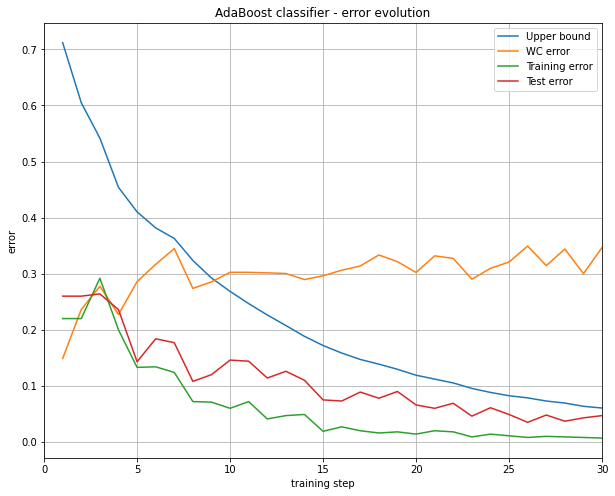

In [12]:
steps = range(1, upper_bound.size + 1)
plt.figure(figsize=(10,8))
plt.plot(steps, upper_bound, label='Upper bound')
plt.plot(steps, wc_error, label='WC error')
plt.plot(steps, trn_errors, label='Training error')
plt.plot(steps, tst_errors, label='Test error')
plt.xlabel('training step')
plt.ylabel('error')
plt.grid()
plt.legend()
plt.xlim(0, 30)
plt.title('AdaBoost classifier - error evolution')
plt.savefig('error_evolution.png')



## Classify images and visualize

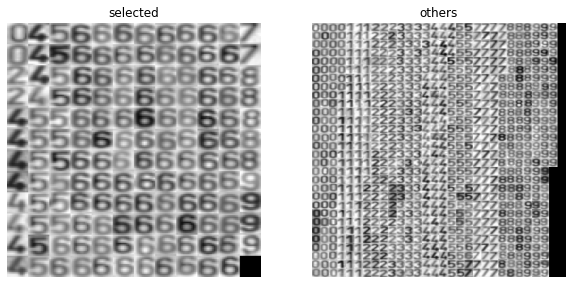

In [14]:
classif = adaboost_classify(classifier, X_tst)
plt.figure(figsize=(10,8))
show_classification(tst_images, classif)
plt.savefig('classification.png')



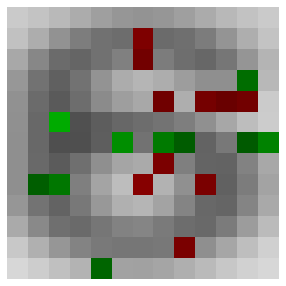

In [15]:
plt.figure(figsize=(5,5))
show_classifiers(trn_images[..., y_trn==1], classifier)
plt.savefig('weak_classifiers.png')

